# Tweet Sentiment Analysis: Analyzing Hate Speech on Twitter

The objective of this model is to detect hate speech by analyzing tweets. The model will use Natural Language Processing (NLP) and various supervised learning / unsupervised learning methods to detect if a tweet has hate speech. Hate speech in this model is considered anything racist or sexist (in real world, there could be various other instances of hate speech). 

Label 1 = Racist / Sexist Speech
Label 0 = Normal tweet 



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk

nltk.download()
!python -m spacy download en

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
/usr/bin/python: No module named spacy


In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweet.csv')

In [3]:
combination = train.append(test, ignore_index = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
combination.shape

(49159, 3)

In [5]:
train.shape

(31962, 3)

## Data Cleaning and Analysis:

To prep the data for analysis, I did a few different things:

- Removed all special characters (kept one row with hashtags as they are important in understanding tweets) 
- Removed URLs and Links as I did not deem them important for this analysis 
- Removed stop words 
- Stemmed tweets 
- Lemmatized tweets 
- Keep words with greater than 5 counts and less than 2000 counts 


In [6]:
import re
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem:
re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df 

In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
test_clean = clean_text(test, "tweet" )
train_clean = clean_text(train, "tweet")

In [9]:
##Most of the tweets are not marked as hate speech (sexist or racist)
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
final = combination
final.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('nb', SGDClassifier()),])

In [12]:
import collections
collections.Counter(final['label'])

Counter({0.0: 29720,
         1.0: 2242,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
       

In [13]:
import re
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_mentionsUrls(text):
    tweet_out = re.sub(r'@[A-Za-z0-9]+', '', text)
    re.sub('https?://[A-Za-z0-9./]+', '', tweet_out)
    return tweet_out

In [15]:
def remove_nonalphanumeric(text):
    text_out = "".join([char for char in text if char not in string.punctuation])
    return text_out

In [16]:
final['Clean_Tweet'] = final['tweet'].apply(lambda x: remove_mentionsUrls(x))
final['Final_Tweet'] = final['Clean_Tweet'].apply(lambda x: remove_nonalphanumeric(x))

In [17]:
def tokanization(text):
    tokens = re.split('\W+', text)
    return tokens

final['Tweet_Token'] = final['Final_Tweet'].apply(lambda x: tokanization(x.lower()))
final.head()

,id,label,tweet,Clean_Tweet,Final_Tweet,Tweet_Token
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[, when, a, father, is, dysfunctional, and, is..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,"[, thanks, for, lyft, credit, i, cant, use, ca..."
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty,"[, bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,"[, factsguide, society, now, motivation]"


In [18]:
import nltk
ps = nltk.PorterStemmer()

def stemming (text):
    out_text = [ps.stem(word) for word in text]
    return out_text

final['Stemmed_Tweet'] = final['Tweet_Token'].apply(lambda x: stemming(x))

In [19]:
wn = nltk.WordNetLemmatizer()
def lemmatize (text):
    out_text = [wn.lemmatize(word) for word in text]
    return out_text
final['Lemma_Tweet'] = final['Tweet_Token'].apply(lambda x: lemmatize(x))
final['Lemma_Tweet'].head()

0    [, when, a, father, is, dysfunctional, and, is...
1    [, thanks, for, lyft, credit, i, cant, use, ca...
2                            [, bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4             [, factsguide, society, now, motivation]
Name: Lemma_Tweet, dtype: object

In [20]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ijyapaudel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remove_stopwords(torkanized_list):
    text_out = [word for word in torkanized_list if word not in stopword]
    return text_out

final['Cleaned_Tweets'] = final['Stemmed_Tweet'].apply(lambda x: remove_stopwords(x))

final['Cleaned_Tweets'][:10]

0    [, father, dysfunct, selfish, drag, hi, kid, h...
1    [, thank, lyft, credit, cant, use, caus, dont,...
2                                  [, bihday, majesti]
3    [model, love, u, take, u, time, urð, ð, ð, ð, ...
4                        [, factsguid, societi, motiv]
5    [22, huge, fan, fare, big, talk, befor, leav, ...
6                         [, camp, tomorrow, dannyâ, ]
7    [next, school, year, year, examsð, cant, think...
8    [love, land, allin, cav, champion, cleveland, ...
9                                [, welcom, im, gr8, ]
Name: Cleaned_Tweets, dtype: object

In [22]:
import itertools
Cleaned_Tweets = list(itertools.chain.from_iterable(final['Cleaned_Tweets']))
print('Unique words after Stop Words: ' +str(len(set(Cleaned_Tweets))))

Unique words after Stop Words: 49897


In [23]:
import itertools 
flat_list = list(itertools.chain.from_iterable(final['Cleaned_Tweets']))

fd = nltk.FreqDist(flat_list)

word_toKeep = list(filter(lambda x: 2000 > x[1]>3, fd.items()))

word_list_ToKeep = [item[0] for item in word_toKeep]

def remove_lessfreq(tokanized_tweets):
    text_out = [word for word in tokanized_tweets if word in word_list_ToKeep]
    return text_out

final['Final_Cleaned_Tweets'] = final['Cleaned_Tweets'].apply(lambda x: remove_lessfreq(x))

final.head()

,id,label,tweet,Clean_Tweet,Final_Tweet,Tweet_Token,Stemmed_Tweet,Lemma_Tweet,Cleaned_Tweets,Final_Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[, when, a, father, is, dysfunctional, and, is...","[, when, a, father, is, dysfunct, and, is, so,...","[, when, a, father, is, dysfunctional, and, is...","[, father, dysfunct, selfish, drag, hi, kid, h...","[father, dysfunct, selfish, drag, hi, kid, hi,..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,"[, thanks, for, lyft, credit, i, cant, use, ca...","[, thank, for, lyft, credit, i, cant, use, cau...","[, thanks, for, lyft, credit, i, cant, use, ca...","[, thank, lyft, credit, cant, use, caus, dont,...","[lyft, credit, cant, use, caus, dont, offer, w..."
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty,"[, bihday, your, majesty]","[, bihday, your, majesti]","[, bihday, your, majesty]","[, bihday, majesti]","[bihday, majesti]"
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, urð, ð, ð, ð, ...","[model, u, take, u, time, urð]"
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,"[, factsguide, society, now, motivation]","[, factsguid, societi, now, motiv]","[, factsguide, society, now, motivation]","[, factsguid, societi, motiv]","[factsguid, societi, motiv]"


In [24]:
Unique_Words = set(list(itertools.chain.from_iterable(final['Final_Cleaned_Tweets'])))

def join_tokens(tokens): 
    document = " ".join([word for word in tokens if not word.isdigit()])
    return document

final['Final_Version'] = final['Final_Cleaned_Tweets'].apply(lambda x: join_tokens(x))
print(Unique_Words)

{'curriculum', 'monitor', 'spice', 'racist', 'spici', 'iri', 'bing', 'jelli', '½ð', 'clover', 'morningâ', 'muscl', 'dome', 'teeth', 'beeroclock', 'growthwithhubspot', 'expans', 'lawyer', 'exactli', 'regular', 'nikki', 'latergram', 'brokenâ', 'exhibitor', 'louis', 'belong', 'ªâ', '300', 'grit', 'whale', 'newyear', 'anger', 'sander', 'jail', 'zoro', 'dave', 'access', 'job', 'acknowledg', 'weddingdress', 'perfectli', 'shatter', 'fridayð', 'yu', 'vers', 'blacksabbath', 'awar', 'abroad', 'youll', 'trio', 'deserv', 'salari', 'renov', 'level', 'pol', 'subject', 'tuesdaymotiv', 'colombia', 'garden', 'mc', 'bo', 'greatday', 'sundayvib', 'slander', 'journo', '63', 'showâ', 'avoid', 'newest', 'drought', 'govern', 'brazilian', '42k', 'truelov', 'rescu', 'weekendð', 'indiegogo', 'knew', 'fitter', 'epic', 'quietli', 'averag', 'highest', 'bet', 'hogwa', 'result', 'squirrel', 'dispos', 'bunni', 'float', 'amedit', 'havent', 'twhiddleston', 'truestori', 'backpack', 'sohappi', 'hoodi', 'boyfriend', 'good

In [25]:
final.head()

,id,label,tweet,Clean_Tweet,Final_Tweet,Tweet_Token,Stemmed_Tweet,Lemma_Tweet,Cleaned_Tweets,Final_Cleaned_Tweets,Final_Version
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,"[, when, a, father, is, dysfunctional, and, is...","[, when, a, father, is, dysfunct, and, is, so,...","[, when, a, father, is, dysfunctional, and, is...","[, father, dysfunct, selfish, drag, hi, kid, h...","[father, dysfunct, selfish, drag, hi, kid, hi,...",father dysfunct selfish drag hi kid hi dysfunc...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i cant use cause they...,"[, thanks, for, lyft, credit, i, cant, use, ca...","[, thank, for, lyft, credit, i, cant, use, cau...","[, thanks, for, lyft, credit, i, cant, use, ca...","[, thank, lyft, credit, cant, use, caus, dont,...","[lyft, credit, cant, use, caus, dont, offer, w...",lyft credit cant use caus dont offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty,"[, bihday, your, majesty]","[, bihday, your, majesti]","[, bihday, your, majesty]","[, bihday, majesti]","[bihday, majesti]",bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, urð, ð, ð, ð, ...","[model, u, take, u, time, urð]",model u take u time urð
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation,"[, factsguide, society, now, motivation]","[, factsguid, societi, now, motiv]","[, factsguide, society, now, motivation]","[, factsguid, societi, motiv]","[factsguid, societi, motiv]",factsguid societi motiv


# Data Visualization & Findings: 

One way to understand this dataset is to visualize what words show up frequently. One tool I found to do this was using the "Word Cloud" function in bython. This allows you to create a word cloud with words that appear the most frequently.

### Entire Dataset - appears mostly netural / positive 

When we look at the entire dataset, most of the words appear to be neutral / positive. For example: Life, Today, New, Bihday (variation of birthday), Make etc. 

This is expected as most of our tweets are neutral in case and are not labeled to be hate speech.


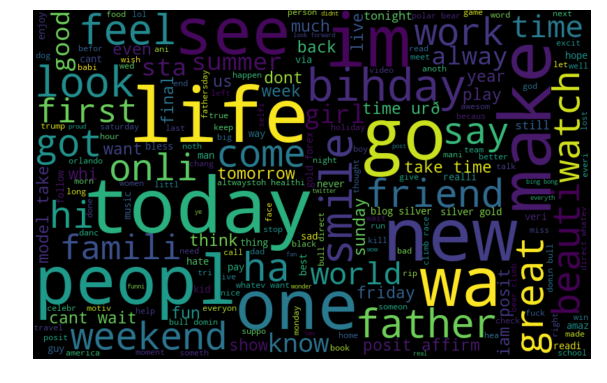

In [26]:
all_words = ' '.join([text for text in final['Final_Version']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Normal Tweets - tweets not marked as hate speech 

This also appears similar to the entire dataset showcased above. This one does have few other words popping up like "weekend" which may be tied to a positive experience, "beautiful", "feel", "smile" etc. 

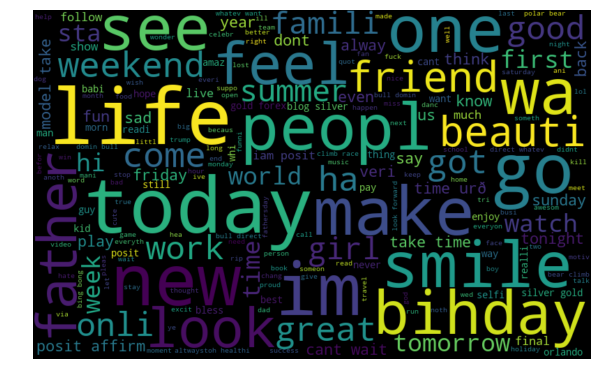

In [27]:
normal_tweets =' '.join([text for text in final['Final_Version'][final['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Negative Tweets - tweets marked as hate speech

This is where it gets interesting! The tweets marked as hate speech have terminology that are mostly rooted in politics (mostly American politics it appears). The words that jumps out are "Trump", "White", "Allah's Oil (shown as one word), "SJW (Social Justice Warrior)", "Women", "Libtard" and "Hate" 

This shows that tweets that used these terminology / had similar languages were demeed as hate speech. The tweets are also very political in nature. There might also need to be a deeper analysis regarding sourcing of the data. If the data was attained from source that misclassified tweets that were denouncing hate speech by using some of these terms then it would be misleading. 


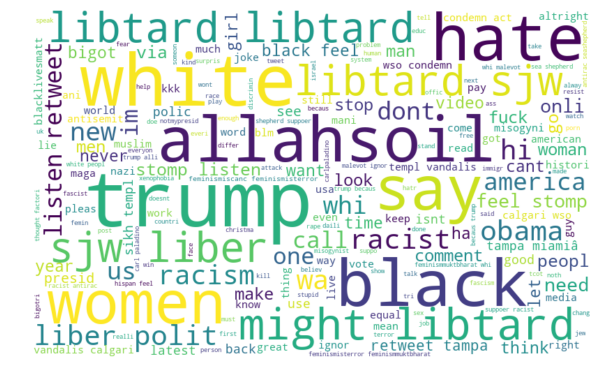

In [28]:
negative_tweets = ' '.join([text for text in final['Final_Version'][final['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, background_color = "white").generate(negative_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [30]:
HT_regular = hashtag_extract(final['Clean_Tweet'][final['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(final['Clean_Tweet'][final['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [31]:
HT_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

## Visualization using hashtags - Normal Tweets:

Here we have the most frequently used hashtags for tweets that are marked as "normal". These words can be assumed to be positive: love, positive, healthy, smile, thankful etc. 

This gives us a idea of what people are tweeting about when their tweets are not deemed controversial or hate speech.

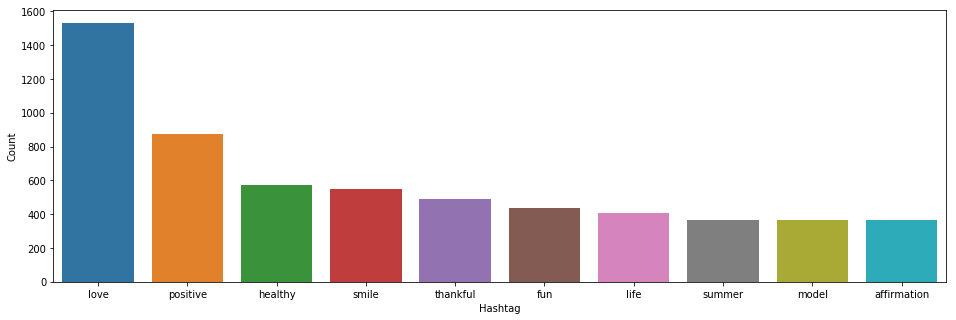

In [32]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Visualization using hashtags - Negative tweets: 

Here we can see similar to the Word Cloud used above, most of the tweets deemed negative are related to politics in some way and maybe race identity (inclusion of the word "black"). 

There is also a neutral word that is included "retweet" which does not appear to relate to anything in particular. I am also unsure what "miamia" means which I tried to look up but, didn't find anything in particular. 

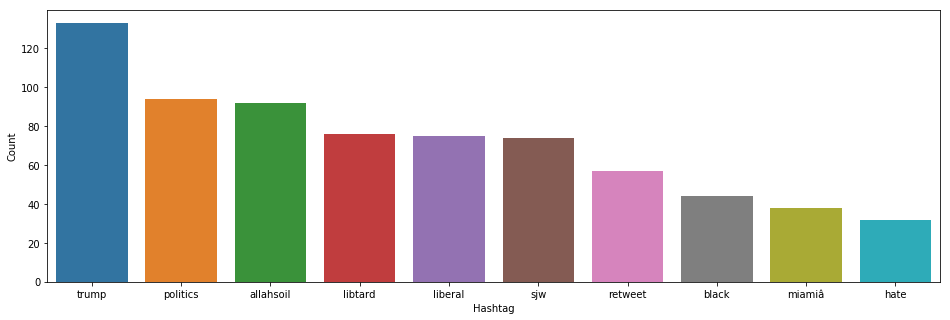

In [33]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## CountVectorizer & TFIDF Vectorizer:

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 2000)
bow = bow_vectorizer.fit_transform(final['Final_Version'])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vec.fit_transform(final['Final_Version'])
print(tfidf.shape)

(49159, 1000)


In [36]:
final['label'].dropna(how = all)
final = final.dropna(axis = 1, how = 'all')
final = final.fillna(0)

In [37]:
final.shape

(49159, 11)

In [38]:
final['label'].value_counts()

0.0    46917
1.0     2242
Name: label, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final['Final_Version'], final['label'], test_size=0.2)

## Supervised Learning Models:

### Naive Bayes Model using MultinominalNB to solve this classification problem. 

I used this model as it was a simple / easy to understand model to solve this classification problem. I used the MultinominalNB as this works well with text features and alongside TIFID. 

I initially created a pipeline with CountVectorizer, TFIDTransformer, and the Naive Bayes Classifier. I also did a GridSearch to find the best parameters.

The overall accuracy of the model was 95.88% which is in line with our benchmark score as there is a large class imbalance in our dataset

In [ ]:
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [52]:
from sklearn.model_selection import GridSearchCV 
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }
grid_search = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.4min finished


0.9588079739625712
{'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


### Then, I generated the Classification Report for the model. 

Here we can see that precision for 0 (normal tweets) is 97% while negative tweets is only 55%. In addition, the F-1 Score for the minority class of tweets is also low. This shows there is an imbalance in our data and tweets that are hateful are a bit more difficult to predict. Our model mostly returns tweets to be positive. 


In [53]:
from sklearn import metrics
predicted = grid_search.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      9391
         1.0       0.55      0.41      0.47       441

   micro avg       0.96      0.96      0.96      9832
   macro avg       0.76      0.70      0.73      9832
weighted avg       0.95      0.96      0.96      9832



In [54]:
print(grid_search.score(X_train, y_train))

0.9901340046278638


### Confusion Matrix:

Here I generate a confusion matrix. Here is a breakdown of the matrix:

- Normal Tweet (9245) *True Negatives - no hate speech* 
- Normal Tweet (146) *False positive - negative tweets that got marked as positive* 
- Hate Speech Tweet (259) *False Negative - hate speech that got marked as normal* 
- Hate Spech Tweet (182) *True positive - hate speech that got marked correctly* 

In [55]:
from sklearn.metrics import confusion_matrix
print('confusion matrix: \n',confusion_matrix(y_test,predicted))
print('\n')

confusion matrix: 
 [[9245  146]
 [ 259  182]]




### Logistic Regression: 

I then used Logistic Regression as a model. I used the same pipeline method using CountVectorizer / TFIDF and then did a grid search to find the best parameters.

From this, the model generated a 95.63% accuracy which is in line with our benchmark score. 


In [56]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [58]:
from sklearn.model_selection import GridSearchCV 
parameters = [{'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'model__C': (1, 10, 20, 30, 40, 50, 100),
             }]
grid_search = GridSearchCV(pipeline, cv=10, param_grid=parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9562652563059398
{'bow__ngram_range': (1, 2), 'model__C': 20, 'tfidf__use_idf': False}


### Classification Report: 

Classification report using LogReg shows the same issue of class imbalance. 

In [59]:
from sklearn import metrics
predicted = grid_search.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      9391
         1.0       0.52      0.37      0.43       441

   micro avg       0.96      0.96      0.96      9832
   macro avg       0.74      0.68      0.70      9832
weighted avg       0.95      0.96      0.95      9832



In [60]:
from sklearn.metrics import confusion_matrix
print('confusion matrix: \n',confusion_matrix(y_test,predicted))
print('\n')

confusion matrix: 
 [[9238  153]
 [ 277  164]]




In [61]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('model', SVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
print("done")

done


In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters = [{'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'model__C': (1, 10, 20, 30, 40, 50, 100),
               'model__kernel': ('linear', 'rbf')
             }]
grid_search = GridSearchCV(pipeline, cv=10, param_grid=parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)

## Clustering Attempt:

Here is a general clustering attempt I tried by using the K-Means model. 

I used the general dataset at first. The tweets are clustered fairly randomly. 

In [93]:
from sklearn.cluster import KMeans
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vec.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")


Top terms per cluster:
Cluster 0:
 time
 get
 go
 new
 take
 make
 see
 like
 peopl
 wa
Cluster 1:
 today
 wa
 go
 got
 good
 great
 get
 im
 new
 sta
Cluster 2:
 im
 life
 grate
 way
 live
 affirm
 find
 go
 final
 found
Cluster 3:
 bihday
 wish
 celebr
 girl
 pay
 cake
 queen
 bless
 friend
 great
Cluster 4:
 smile
 cute
 photooftheday
 beauti
 instagood
 followm
 tbt
 toptag
 selfi
 make
Cluster 5:
 father
 dad
 fathersday
 wish
 daddi
 famili
 world
 celebr
 son
 wonder
Cluster 6:
 posit
 affirm
 iam
 abl
 good
 freedom
 sens
 friend
 vacat
 internet
Cluster 7:
 one
 feel
 like
 retweet
 listen
 stomp
 onli
 make
 good
 get
Cluster 8:
 music
 song
 play
 get
 free
 dj
 video
 new
 danc
 enjoy
Cluster 9:
 come
 ha
 tomorrow
 us
 onli
 see
 go
 get
 cant
 new


Prediction


In [95]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
clusters = model.labels_.tolist()
films = {'Tweets': final["Final_Version"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(films, index = [clusters])
frame

,Tweets,Cluster
5,father dysfunct selfish drag hi kid hi dysfunc...,5
0,lyft credit cant use caus dont offer wheelchai...,0
3,bihday majesti,3
0,model u take u time urð,0
0,factsguid societi motiv,0
0,huge fan fare big talk befor leav chao pay get,0
9,camp tomorrow,9
0,next school year year cant think school exam h...,0
0,land cav champion cleveland,0
2,welcom im gr8,2
